# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, classification_report

# Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\DS\note\10  Machine Learning\Phase - 02\18  emotions.csv')

In [3]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0
...,...,...
11995,i feel weird using his first name but the alte...,5
11996,i read them i feel pleasantly surprised that t...,5
11997,i feel a strange sense of guilt about it all,5
11998,i let people know how i m actually feeling and...,5


In [4]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0


In [5]:
df.shape

(12000, 2)

In [6]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [7]:
# 0 - Sad
# 1 - Joy
# 2 - Love
# 3 - Anger
# 4 - Fear
# 5 - Suprise

In [8]:
df['label'] = df['label'].map({0 : 'Sad', 1 : 'Joy', 2 : 'Love', 3 : 'Anger', 4 : 'Fear', 5 : 'Suprise'})

In [9]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,Sad
1,i dont know i feel so lost,Sad
2,i was beginning to feel quite disheartened,Sad
3,i can still lose the weight without feeling de...,Sad
4,im feeling a little like a damaged tree and th...,Sad
...,...,...
11995,i feel weird using his first name but the alte...,Suprise
11996,i read them i feel pleasantly surprised that t...,Suprise
11997,i feel a strange sense of guilt about it all,Suprise
11998,i let people know how i m actually feeling and...,Suprise


## Exploratory Data Analysis

In [10]:
# Missing values
df.isna().sum()

text     0
label    0
dtype: int64

In [11]:
# Duplicates
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

<Axes: >

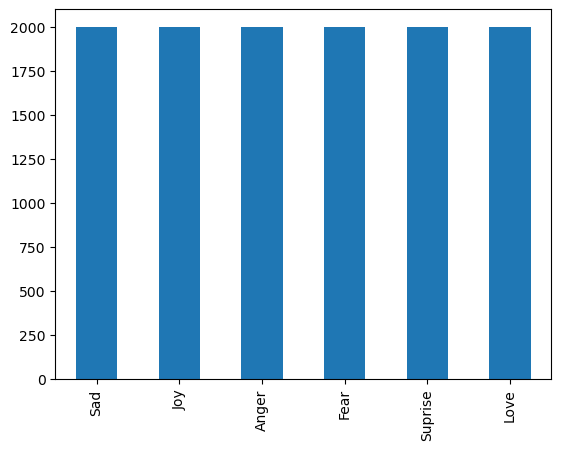

In [14]:
# Distributions
df['label'].value_counts().plot(kind = 'bar')

## Splitting the Data

In [15]:
X = df['text']
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 23, shuffle= True)

In [17]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([('vectorization', CountVectorizer(stop_words = 'english')), ('estimator', MultinomialNB(alpha=3))])

In [33]:
pipe

Pipeline(steps=[('vectorization', CountVectorizer(stop_words='english')),
                ('estimator', MultinomialNB(alpha=3))])

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorization', CountVectorizer(stop_words='english')),
                ('estimator', MultinomialNB(alpha=3))])

In [37]:
y_pred = pipe.predict(X_test)
y_pred

array(['Sad', 'Sad', 'Fear', ..., 'Anger', 'Love', 'Sad'], dtype='<U7')

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

0.8475

### Creating the Pickle file

In [40]:
import pickle

In [42]:
pickle.dump(pipe, open('34  estimator.pkl', 'wb'))

In [43]:
import os
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\DS\\note\\10  Machine Learning\\Phase - 02'

In [47]:
predict = pickle.load(open('34  estimator.pkl', 'rb'))

In [48]:
predict.predict(['iam feeling lonely'])[0]

'Sad'